In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. Data Processing: 

In [171]:
#a)Import the data

df = pd.read_csv('ProviderInfo.csv')

In [172]:
df.head()

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,PHONE,COUNTY_SSA,COUNTY_NAME,OWNERSHIP,...,CYCLE_2_REVISIT_SCORE,CYCLE_2_TOTAL_SCORE,WEIGHTED_ALL_CYCLES_SCORE,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT,FILEDATE
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2.563324e+09,290.0,Franklin,For profit - Individual,...,0,8,3.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
1,15010,COOSA VALLEY NURSING FACILITY,315 WEST HICKORY STREET,SYLACAUGA,AL,35150.0,2.562496e+09,600.0,Talladega,For profit - Corporation,...,0,16,28,0.0,0.0,1.0,15259.0,1.0,2.0,2018-07-01
2,15012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768.0,2.562184e+09,350.0,Jackson,Government - County,...,0,12,31.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206.0,2.058330e+09,360.0,Jefferson,For profit - Corporation,...,0,24,33.6,0.0,1.0,0.0,0.0,0.0,0.0,2018-07-01
4,15015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY P O BOX 97,MC CALLA,AL,35111.0,2.054776e+09,360.0,Jefferson,For profit - Corporation,...,0,24,19.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01


In [178]:
#choosing only columns with numeric values
df1 = df._get_numeric_data()

In [179]:
#dropping phone and country columns
df2 = df1.drop(['PHONE','COUNTY_SSA'], axis=1)

In [180]:
df2.shape

(15617, 28)

In [181]:
df2.head()

,ZIP,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,35653.0,57.0,51.5,5.0,5.0,5.0,4.0,4.0,3.43572,1.16495,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
1,35150.0,85.0,74.2,3.0,3.0,5.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,15259.0,1.0,2.0
2,35768.0,50.0,NaN,1.0,2.0,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,35206.0,92.0,79.8,2.0,2.0,4.0,3.0,3.0,2.32722,0.82104,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,35111.0,103.0,98.1,3.0,3.0,4.0,3.0,2.0,2.33617,0.92407,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
# b) replacing nat with nan and then dropping nan

df2.replace(["NaN", 'NaT'], np.nan, inplace = True) 
clean_df= df2.dropna(axis = 0)

In [184]:
clean_df.shape

(14557, 28)

In [185]:
#c) Split into train / test set using an 80/20 split.

X = clean_df.drop('OVERALL_RATING', axis =1)
y = clean_df[['OVERALL_RATING']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 123 )

In [186]:
#d) Scale X_train data

scaling_tool = StandardScaler()

X_train_scaled = scaling_tool.fit_transform(X_train)
X_test_scaled = scaling_tool.transform(X_test)

# 2. Model #1: Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [188]:
# a) Using LogisticRegression(), to build a model to predict the "OVERALL_RATING"

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
predicted_test = lr.predict(X_test_scaled)

C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
# b) calculating the score

metrics.accuracy_score(predicted_test,y_test)

0.7084478021978022

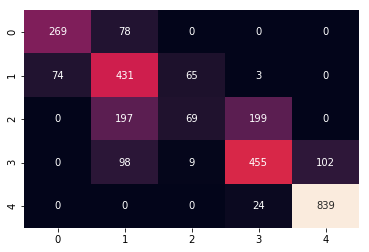

In [119]:
# c) confusion matrix & classification report for the test data

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted_test)
sns.heatmap(cm, annot=True, square=False, fmt='', cbar=False)

In [85]:
print(metrics.classification_report(y_test, predicted, target_names=None))

             precision    recall  f1-score   support

        1.0       0.78      0.78      0.78       347
        2.0       0.54      0.75      0.63       573
        3.0       0.48      0.15      0.23       465
        4.0       0.67      0.69      0.68       664
        5.0       0.89      0.97      0.93       863

avg / total       0.69      0.71      0.68      2912



d) 'Class 2' got predicted poorly whereas 'Class 4' got predicted the best.


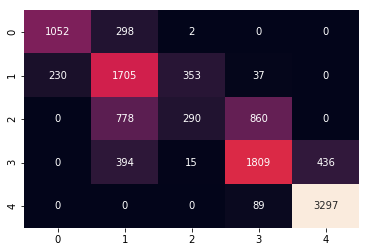

In [120]:
# e) Confusion matrix & classification report for the train data
#     There are no signs of overfitting as classification reports of train and test gives similar results.

predicted_train = lr.predict(X_train_scaled)
cm = confusion_matrix(y_train, predicted_train)
sns.heatmap(cm, annot=True, square=False, fmt='', cbar=False)

In [140]:
print(metrics.classification_report(y_train, predicted_train, target_names=None))

             precision    recall  f1-score   support

        1.0       0.82      0.78      0.80      1352
        2.0       0.54      0.73      0.62      2325
        3.0       0.44      0.15      0.22      1928
        4.0       0.65      0.68      0.66      2654
        5.0       0.88      0.97      0.93      3386

avg / total       0.68      0.70      0.67     11645



In [123]:
# f) predicted probability

print(lr.predict_proba(X_test_scaled)) 

[[5.52727960e-01 3.86604404e-01 4.28079017e-02 1.78597338e-02
  4.06392073e-10]
 [1.00934484e-07 1.21859853e-02 7.63550984e-02 2.52555179e-01
  6.58903637e-01]
 [7.73989990e-06 3.02220317e-01 1.48954896e-01 2.99244401e-01
  2.49572646e-01]
 ...
 [2.96305643e-01 2.68611829e-01 2.65328595e-01 1.69753918e-01
  1.50113408e-08]
 [1.05328170e-01 3.24982198e-01 3.03893173e-01 2.65796051e-01
  4.08416068e-07]
 [4.36620046e-03 5.98874253e-01 2.12425229e-01 1.84273455e-01
  6.08622952e-05]]


# 3. Model #2: PCA(n_components = 2) + Logistic Regression

In [86]:
from sklearn.decomposition import PCA

In [89]:
# a) limit PCA object to 2 components 
pca_2 = PCA(n_components=2)

In [149]:
# b) using pca object to fit & apply pca transformation to data 
X_train_pca2 = pca_2.fit_transform(X_train_scaled)
X_test_pca2= pca_2.transform(X_test_scaled)

In [141]:
#using the transformed data (X_train_pca_2) to fit a Logistic Regression model and check accuracy

lr = LogisticRegression()
lr.fit(X_train_pca2, y_train)
predicted_pca2_test = lr.predict(X_test_pca2)
metrics.accuracy_score(predicted_pca2,y_test)


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3914835164835165

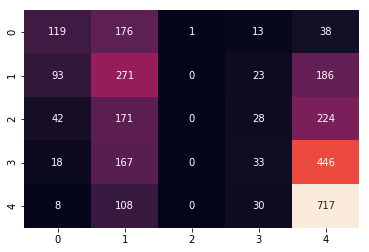

In [148]:
# c) Calculating the confusion matrix and classification report for the test data

cm_pca2 = confusion_matrix(y_test, predicted_pca2_test)
sns.heatmap(cm_pca2, annot=True, square=False, fmt='', cbar=False)


In [136]:
print(metrics.classification_report(y_test, predicted_pca2, target_names=None))

             precision    recall  f1-score   support

        1.0       0.42      0.34      0.38       347
        2.0       0.30      0.47      0.37       573
        3.0       0.00      0.00      0.00       465
        4.0       0.26      0.05      0.08       664
        5.0       0.45      0.83      0.58       863

avg / total       0.30      0.39      0.31      2912



C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


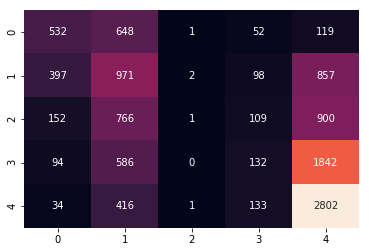

In [157]:
# d) Calculating the confusion matrix and classification report for the train data

lr = LogisticRegression()
lr.fit(X_train_pca2, y_train)
predicted_pca2_train = lr.predict(X_train_pca2)

cm_pca2 = confusion_matrix(y_train, predicted_pca2_train)
sns.heatmap(cm_pca2, annot=True, square=False, fmt='', cbar=False)


In [158]:
print(metrics.classification_report(y_train, predicted_pca2_train, target_names=None))

             precision    recall  f1-score   support

        1.0       0.44      0.39      0.42      1352
        2.0       0.29      0.42      0.34      2325
        3.0       0.20      0.00      0.00      1928
        4.0       0.25      0.05      0.08      2654
        5.0       0.43      0.83      0.57      3386

avg / total       0.32      0.38      0.30     11645



e) This model performs worse than model 1.This might be because there are only 2 principal components in the 
model and this might be causing it to miss some vital information whereas model 1 is using all the features so it is performing
better.

# 4. Model #3: PCA(n_components = 16) + Logistic Regression

In [75]:
from sklearn.decomposition import PCA

In [137]:
# a) limiting PCA object to 16 components 
pca_16 = PCA(n_components=16)

In [138]:
# using pca object to fit & apply pca transformation to data 
X_train_pca16 = pca_16.fit_transform(X_train_scaled)
X_test_pca16 = pca_16.transform(X_test_scaled)

In [143]:
#b) using the transformed data (X_train_pca_16) to fit a Logistic Regression model and check accuracy

lr.fit(X_train_pca16, y_train)
predicted_pca16_test = lr.predict(X_test_pca16)

metrics.accuracy_score(predicted_pca16_test,y_test)

C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7032967032967034

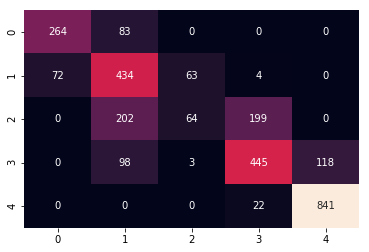

In [144]:
# c) Calculating the confusion matrix and classification report for the test data

cm_pca16 = confusion_matrix(y_test, predicted_pca16_test)
sns.heatmap(cm_pca16, annot=True, square=False, fmt='', cbar=False)

In [101]:
print(metrics.classification_report(y_test, predicted_pca16, target_names=None))

             precision    recall  f1-score   support

        1.0       0.79      0.76      0.77       347
        2.0       0.53      0.76      0.62       573
        3.0       0.49      0.14      0.22       465
        4.0       0.66      0.67      0.67       664
        5.0       0.88      0.97      0.92       863

avg / total       0.69      0.70      0.68      2912



C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


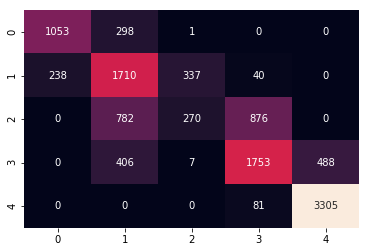

In [159]:
# d)Calculating the confusion matrix and classification report for the train data
#   There are no signs of overfitting as classification reports of train and test gives similar results.

lr = LogisticRegression()
lr.fit(X_train_pca16, y_train)
predicted_pca16_train = lr.predict(X_train_pca16)

cm_pca16 = confusion_matrix(y_train, predicted_pca16_train)
sns.heatmap(cm_pca16, annot=True, square=False, fmt='', cbar=False)


In [160]:
print(metrics.classification_report(y_train, predicted_pca16_train, target_names=None))

             precision    recall  f1-score   support

        1.0       0.82      0.78      0.80      1352
        2.0       0.54      0.74      0.62      2325
        3.0       0.44      0.14      0.21      1928
        4.0       0.64      0.66      0.65      2654
        5.0       0.87      0.98      0.92      3386

avg / total       0.67      0.69      0.67     11645

